In [52]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal, glorot_normal
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential 
from keras.layers import Dense, Activation

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time


from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

from sklearn.model_selection import train_test_split


In [2]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
#loading mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#seperating cv data from train data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_cv.shape[0], "and each image is of shape (%d, %d)"%(X_cv.shape[1], X_cv.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 48000 and each image is of shape (28, 28)
Number of training examples : 12000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


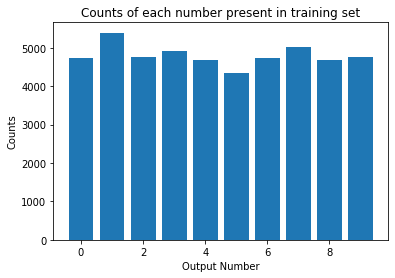

In [6]:
#finding counts or distribution of outputs to identify which error metric to use
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Output Number')
plt.ylabel('Counts')
plt.title('Counts of each number present in training set')
plt.show()

In [7]:
# convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 
X_cv = X_cv.reshape(X_cv.shape[0], X_cv.shape[1]*X_cv.shape[2]) 

In [8]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))
print("Number of training examples :", X_cv.shape[0], "and each image is of shape (%d)"%(X_cv.shape[1]))

Number of training examples : 48000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)
Number of training examples : 12000 and each image is of shape (784)


In [9]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  29 151 254 254 254 254 235   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  65 249 253 253 253 253 253 253
 108   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 126 244 253 253 233 142  59  95 253 110   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  36 212 250 253 253 178  55   0  14
 186 138   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  86 217 253 253 228  58   7   0   0   4  23   0   

In [10]:
#performing one hot encoding on output label
#consider an image loabel is 5, so convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
Y_cv = np_utils.to_categorical(y_cv, 10)
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Building a single SoftMax classifier

In [76]:
#defining model parameters

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 100

In [12]:
#building a simple model to compare loss with further models
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 16us/step - loss: 10.0669 - acc: 0.3741 - val_loss: 9.6869 - val_acc: 0.3972
Epoch 2/100
48000/48000 [==============================] - 1s 13us/step - loss: 8.6976 - acc: 0.4593 - val_loss: 8.6756 - val_acc: 0.4608
Epoch 3/100
48000/48000 [==============================] - 1s 13us/step - loss: 8.5171 - acc: 0.4710 - val_loss: 8.5257 - val_acc: 0.4702
Epoch 4/100
48000/48000 [==============================] - 1s 13us/step - loss: 8.5212 - acc: 0.4708 - val_loss: 8.4557 - val_acc: 0.4749
Epoch 5/100
48000/48000 [==============================] - 1s 13us/step - loss: 8.4801 - acc: 0.4733 - val_loss: 8.5118 - val_acc: 0.4714
Epoch 6/100
48000/48000 [==============================] - 1s 13us/step - loss: 8.5137 - acc: 0.4713 - val_loss: 8.4952 - val_acc: 0.4724
E

48000/48000 [==============================] - 1s 12us/step - loss: 8.2746 - acc: 0.4864 - val_loss: 8.2985 - val_acc: 0.4849
Epoch 56/100
48000/48000 [==============================] - 1s 13us/step - loss: 8.2599 - acc: 0.4874 - val_loss: 8.2753 - val_acc: 0.4863
Epoch 57/100
48000/48000 [==============================] - 1s 12us/step - loss: 8.2632 - acc: 0.4871 - val_loss: 8.2942 - val_acc: 0.4851
Epoch 58/100
48000/48000 [==============================] - 1s 12us/step - loss: 8.2420 - acc: 0.4884 - val_loss: 8.2888 - val_acc: 0.4853
Epoch 59/100
48000/48000 [==============================] - 1s 12us/step - loss: 8.2945 - acc: 0.4852 - val_loss: 8.3673 - val_acc: 0.4805
Epoch 60/100
48000/48000 [==============================] - 1s 12us/step - loss: 8.2836 - acc: 0.4858 - val_loss: 8.2716 - val_acc: 0.4864
Epoch 61/100
48000/48000 [==============================] - 1s 12us/step - loss: 8.2632 - acc: 0.4871 - val_loss: 8.3015 - val_acc: 0.4849
Epoch 62/100
48000/48000 [==============

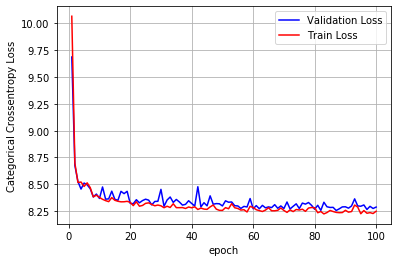

In [13]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

C:\Users\mishra_s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


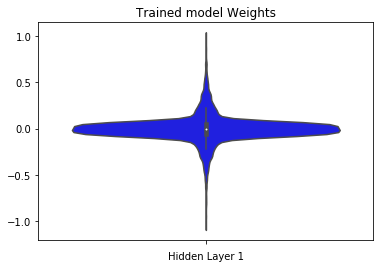

In [14]:
#monitoring weights to check if they are not overshooting
w_after = model.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 1, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.show()

In [15]:
#finding loss and accuracy on test data
mlp_1_score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_1_score[0]) 
print('Test accuracy:', mlp_1_score[1])

Test score: 8.244479760742188
Test accuracy: 0.4884


## MLP with 2 hidden layers

In [16]:
#defining model architecture
model_mlp_2 = Sequential()
model_mlp_2.add(Dense(512, activation="sigmoid", input_shape=(input_dim,))) #first hidden layer with 512 units
model_mlp_2.add(Dense(128, activation="sigmoid")) #second hidden layer with 128 units
model_mlp_2.add(Dense(output_dim, activation="softmax")) #output layer

model_mlp_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_mlp_2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 85us/step - loss: 1.7234 - acc: 0.6262 - val_loss: 1.2650 - val_acc: 0.7983
Epoch 2/100
48000/48000 [==============================] - 4s 78us/step - loss: 1.0166 - acc: 0.8278 - val_loss: 0.8221 - val_acc: 0.8492
Epoch 3/100
48000/48000 [==============================] - 4s 80us/step - loss: 0.7134 - acc: 0.8635 - val_loss: 0.6213 - val_acc: 0.8726
Epoch 4/100
48000/48000 [==============================] - 4s 83us/step - loss: 0.5619 - acc: 0.8833 - val_loss: 0.5122 - val_acc: 0.8855
Epoch 5/100
48000/48000 [==============================] - 4s 77us/step - loss: 0.4723 - acc: 0.8956 - val_loss: 0.4440 - val_acc: 0.8968
Epoch 6/100
48000/48000 [==============================] - 4s 77us/step - loss: 0.4146 - acc: 0.9037 - val_loss: 0.3991 - val_acc: 0.9018
Epoch 7/100
48000/48000 [==============================] - 4s 77us/step - loss: 0.3738 - acc: 0.9098 - val_loss: 0.3665 - 

48000/48000 [==============================] - 4s 86us/step - loss: 0.0805 - acc: 0.9804 - val_loss: 0.1742 - val_acc: 0.9437
Epoch 60/100
48000/48000 [==============================] - 4s 81us/step - loss: 0.0794 - acc: 0.9807 - val_loss: 0.1737 - val_acc: 0.9445
Epoch 61/100
48000/48000 [==============================] - 4s 80us/step - loss: 0.0784 - acc: 0.9807 - val_loss: 0.1732 - val_acc: 0.9437
Epoch 62/100
48000/48000 [==============================] - 4s 80us/step - loss: 0.0772 - acc: 0.9813 - val_loss: 0.1730 - val_acc: 0.9442
Epoch 63/100
48000/48000 [==============================] - 4s 81us/step - loss: 0.0761 - acc: 0.9814 - val_loss: 0.1723 - val_acc: 0.9447
Epoch 64/100
48000/48000 [==============================] - 4s 83us/step - loss: 0.0754 - acc: 0.9814 - val_loss: 0.1724 - val_acc: 0.9437
Epoch 65/100
48000/48000 [==============================] - 4s 82us/step - loss: 0.0744 - acc: 0.9817 - val_loss: 0.1719 - val_acc: 0.9438
Epoch 66/100
48000/48000 [==============

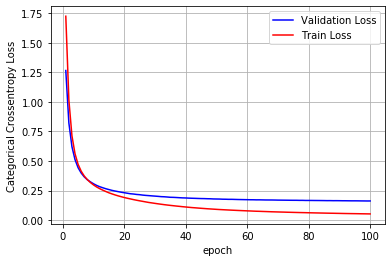

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

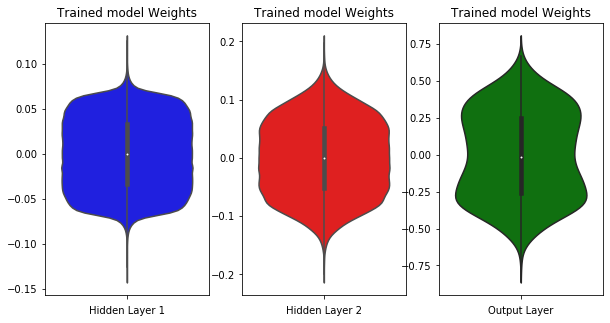

In [19]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [20]:
#finding loss and accuracy on test data
mlp_2_score = model_mlp_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_score[0]) 
print('Test accuracy:', mlp_2_score[1])

Test score: 0.1581770802466199
Test accuracy: 0.9502


## Observation:
- we are getting better accuracy with 2 hidden layer as compare with one layer network

## MLP with 2 hidden layers with different no of units 

In [21]:
#defining model architecture
model_mlp_2_b = Sequential()
model_mlp_2_b.add(Dense(512, activation="sigmoid", input_shape=(input_dim,))) #first hidden layer with 512 units
model_mlp_2_b.add(Dense(256, activation="sigmoid")) #second hidden layer with 128 units
model_mlp_2_b.add(Dense(output_dim, activation="softmax")) #output layer

model_mlp_2_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_mlp_2_b.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_2_b.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 96us/step - loss: 1.7340 - acc: 0.6145 - val_loss: 1.2390 - val_acc: 0.7988
Epoch 2/100
48000/48000 [==============================] - 4s 91us/step - loss: 0.9786 - acc: 0.8316 - val_loss: 0.7770 - val_acc: 0.8521
Epoch 3/100
48000/48000 [==============================] - 4s 89us/step - loss: 0.6716 - acc: 0.8671 - val_loss: 0.5826 - val_acc: 0.8748
Epoch 4/100
48000/48000 [==============================] - 4s 88us/step - loss: 0.5268 - acc: 0.8855 - val_loss: 0.4797 - val_acc: 0.8897
Epoch 5/100
48000/48000 [==============================] - 4s 89us/step - loss: 0.4444 - acc: 0.8966 - val_loss: 0.4179 - val_acc: 0.8991
Epoch 6/100
48000/48000 [==============================] - 4s 88us/step - loss: 0.3909 - acc: 0.9059 - val_loss: 0.3763 - val_acc: 0.9059
Epoch 7/100
48000/48000 [==============================] - 4s 88us/step - loss: 0.3535 - acc: 0.9113 - val_loss: 0.3479 - 

48000/48000 [==============================] - 4s 88us/step - loss: 0.0761 - acc: 0.9818 - val_loss: 0.1722 - val_acc: 0.9440
Epoch 60/100
48000/48000 [==============================] - 4s 88us/step - loss: 0.0748 - acc: 0.9822 - val_loss: 0.1714 - val_acc: 0.9454
Epoch 61/100
48000/48000 [==============================] - 4s 91us/step - loss: 0.0739 - acc: 0.9823 - val_loss: 0.1711 - val_acc: 0.9454
Epoch 62/100
48000/48000 [==============================] - 5s 95us/step - loss: 0.0728 - acc: 0.9827 - val_loss: 0.1705 - val_acc: 0.9447
Epoch 63/100
48000/48000 [==============================] - 5s 100us/step - loss: 0.0719 - acc: 0.9830 - val_loss: 0.1705 - val_acc: 0.9448
Epoch 64/100
48000/48000 [==============================] - 5s 96us/step - loss: 0.0710 - acc: 0.9833 - val_loss: 0.1701 - val_acc: 0.9455
Epoch 65/100
48000/48000 [==============================] - 5s 102us/step - loss: 0.0703 - acc: 0.9833 - val_loss: 0.1699 - val_acc: 0.9452
Epoch 66/100
48000/48000 [============

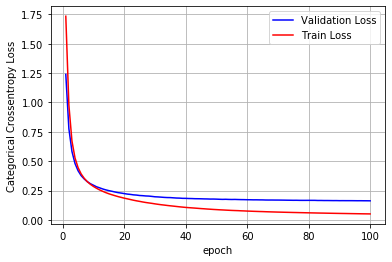

In [23]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

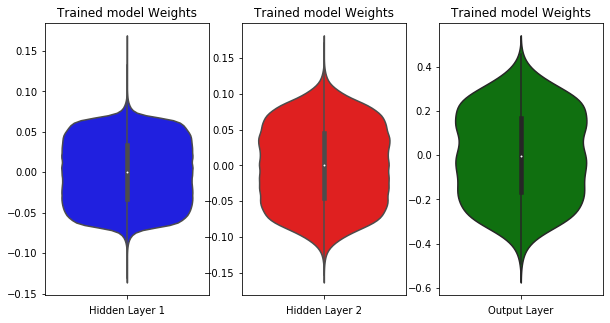

In [24]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_2_b.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [25]:
#finding loss and accuracy on test data
mlp_2_b_score = model_mlp_2_b.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_score[0]) 
print('Test accuracy:', mlp_2_b_score[1])

Test score: 0.15627033765502274
Test accuracy: 0.9523


## Observations:
- we are getting better accuracy with 256 activation units in 2nd hidden layer

## MLP with 3 hidden layers

In [26]:
model_mlp_3 = Sequential()
model_mlp_3.add(Dense(512, input_dim=input_dim, activation="sigmoid"))
model_mlp_3.add(Dense(256, activation="sigmoid"))
model_mlp_3.add(Dense(128, activation="sigmoid"))
model_mlp_3.add(Dense(10, activation="softmax"))

model_mlp_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_mlp_3.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 101us/step - loss: 2.2539 - acc: 0.2584 - val_loss: 2.1815 - val_acc: 0.3519
Epoch 2/100
48000/48000 [==============================] - 4s 93us/step - loss: 2.1008 - acc: 0.5161 - val_loss: 2.0059 - val_acc: 0.5743
Epoch 3/100
48000/48000 [==============================] - 5s 95us/step - loss: 1.8813 - acc: 0.6383 - val_loss: 1.7420 - val_acc: 0.6817
Epoch 4/100
48000/48000 [==============================] - 5s 96us/step - loss: 1.5922 - acc: 0.7027 - val_loss: 1.4414 - val_acc: 0.7209
Epoch 5/100
48000/48000 [==============================] - 4s 92us/step - loss: 1.3082 - acc: 0.7454 - val_loss: 1.1812 - val_acc: 0.7675
Epoch 6/100
48000/48000 [==============================] - 4s 93us/step - loss: 1.0816 - acc: 0.7764 - val_loss: 0.9873 - val_acc: 0.7992
Epoch 7/100
48000/48000 [==============================] - 4s 93us/step - loss: 0.9144 - acc: 0.8024 - val_loss: 0.8451 -

48000/48000 [==============================] - 4s 92us/step - loss: 0.1124 - acc: 0.9735 - val_loss: 0.1999 - val_acc: 0.9404
Epoch 60/100
48000/48000 [==============================] - 4s 92us/step - loss: 0.1106 - acc: 0.9742 - val_loss: 0.1989 - val_acc: 0.9412
Epoch 61/100
48000/48000 [==============================] - 4s 93us/step - loss: 0.1085 - acc: 0.9749 - val_loss: 0.1982 - val_acc: 0.9420
Epoch 62/100
48000/48000 [==============================] - 4s 92us/step - loss: 0.1068 - acc: 0.9753 - val_loss: 0.1975 - val_acc: 0.9417
Epoch 63/100
48000/48000 [==============================] - 4s 93us/step - loss: 0.1049 - acc: 0.9755 - val_loss: 0.1962 - val_acc: 0.9417
Epoch 64/100
48000/48000 [==============================] - 4s 93us/step - loss: 0.1032 - acc: 0.9759 - val_loss: 0.1958 - val_acc: 0.9419
Epoch 65/100
48000/48000 [==============================] - 5s 95us/step - loss: 0.1014 - acc: 0.9764 - val_loss: 0.1951 - val_acc: 0.9418
Epoch 66/100
48000/48000 [==============

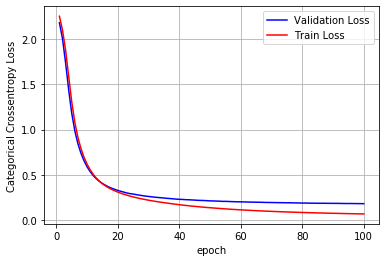

In [28]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Observation:
- here we can see that train and validation loss are coming close with each epoch, still there is huge gap between them.
- So if increase epoch validation loss will decrease

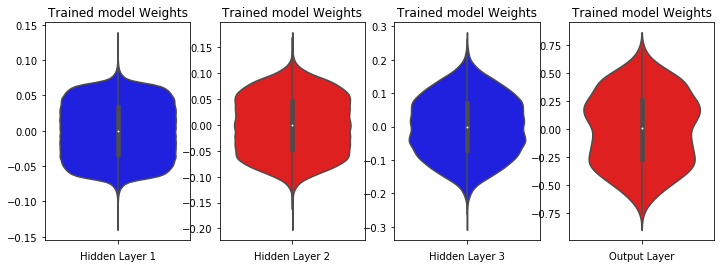

In [29]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12, 4))

plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [30]:
#finding loss and accuracy on test data
mlp_3_score = model_mlp_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_score[0]) 
print('Test accuracy:', mlp_3_score[1])

Test score: 0.1714799745094031
Test accuracy: 0.9498


## Observation:
- we are getting slightly lower accuray then MLP with 2 hidden layers

## MLP with sigmoid activation, Adam optimizer and glorot_normal initializer, 2 hidden layers

In [31]:
model_mlp_adam_2 = Sequential()
model_mlp_adam_2.add(Dense(512, input_dim=input_dim, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_adam_2.add(Dense(256, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_adam_2.add(Dense(10, activation="softmax"))
model_mlp_adam_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_mlp_adam_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_adam_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 7s 147us/step - loss: 0.4572 - acc: 0.8771 - val_loss: 0.2664 - val_acc: 0.9247
Epoch 2/100
48000/48000 [==============================] - 7s 137us/step - loss: 0.2553 - acc: 0.9267 - val_loss: 0.2394 - val_acc: 0.9273
Epoch 3/100
48000/48000 [==============================] - 7s 136us/step - loss: 0.2309 - acc: 0.9313 - val_loss: 0.2184 - val_acc: 0.9347
Epoch 4/100
48000/48000 [==============================] - 7s 137us/step - loss: 0.2134 - acc: 0.9353 - val_loss: 0.2090 - val_acc: 0.9353
Epoch 5/100
48000/48000 [==============================] - 7s 136us/step - loss: 0.2110 - acc: 0.9360 - val_loss: 0.2097 - val_acc: 0.9335
Epoch 6/100
48000/48000 [==============================] - 7s 136us/step - loss: 0.2069 - acc: 0.9361 - val_loss: 0.1997 - val_acc: 0.9377
Epoch 7/100
48000/48000 [==============================] - 7s 136us/step - loss: 0.1894 - acc: 0.9415 - val_loss: 0.

Epoch 59/100
48000/48000 [==============================] - 8s 163us/step - loss: 0.0657 - acc: 0.9786 - val_loss: 0.1054 - val_acc: 0.9690
Epoch 60/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0658 - acc: 0.9784 - val_loss: 0.1049 - val_acc: 0.9669
Epoch 61/100
48000/48000 [==============================] - 9s 180us/step - loss: 0.0663 - acc: 0.9777 - val_loss: 0.1066 - val_acc: 0.9658
Epoch 62/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.0660 - acc: 0.9785 - val_loss: 0.1029 - val_acc: 0.9695
Epoch 63/100
48000/48000 [==============================] - 7s 147us/step - loss: 0.0680 - acc: 0.9776 - val_loss: 0.1036 - val_acc: 0.9684
Epoch 64/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.0665 - acc: 0.9779 - val_loss: 0.1021 - val_acc: 0.9691
Epoch 65/100
48000/48000 [==============================] - 8s 159us/step - loss: 0.0653 - acc: 0.9785 - val_loss: 0.1069 - val_acc: 0.9663
Epoch 66/100
48000/4

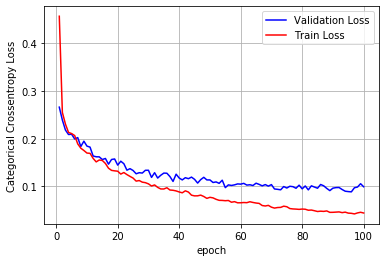

In [33]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

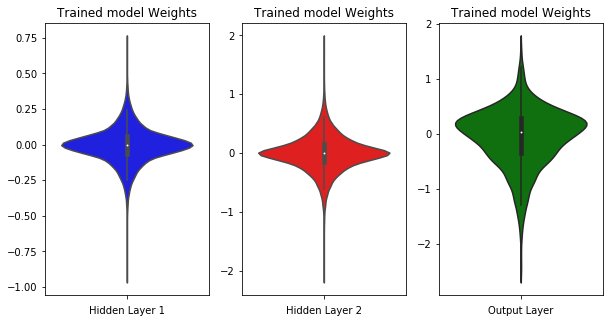

In [34]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_adam_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [35]:
#finding loss and accuracy on test data
mlp_2_adam_score = model_mlp_adam_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_adam_score[0]) 
print('Test accuracy:', mlp_2_adam_score[1])

Test score: 0.09725577596174553
Test accuracy: 0.9704


## MLP with sigmoid activation, Adam optimizer and glorot_normal initializer, 3 hidden layers

In [36]:
model_mlp_adam = Sequential()
model_mlp_adam.add(Dense(512, input_dim=input_dim, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_adam.add(Dense(256, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_adam.add(Dense(128, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_adam.add(Dense(10, activation="softmax"))
model_mlp_adam.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_mlp_adam.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_adam.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.5726 - acc: 0.8519 - val_loss: 0.2742 - val_acc: 0.9223
Epoch 2/100
48000/48000 [==============================] - 8s 160us/step - loss: 0.2607 - acc: 0.9239 - val_loss: 0.2485 - val_acc: 0.9237
Epoch 3/100
48000/48000 [==============================] - 8s 158us/step - loss: 0.2333 - acc: 0.9296 - val_loss: 0.2089 - val_acc: 0.9363
Epoch 4/100
48000/48000 [==============================] - 7s 148us/step - loss: 0.2194 - acc: 0.9328 - val_loss: 0.2200 - val_acc: 0.9303
Epoch 5/100
48000/48000 [==============================] - 7s 147us/step - loss: 0.2111 - acc: 0.9348 - val_loss: 0.2062 - val_acc: 0.9340
Epoch 6/100
48000/48000 [==============================] - 7s 150us/step - loss: 0.1966 - acc: 0.9393 - val_loss: 0.1977 - val_acc: 0.9379
Epoch 7/100
48000/48000 [==============================] - 7s 154us/step - loss: 0.1870 - acc: 0.9417 - val_loss: 0.

48000/48000 [==============================] - 7s 146us/step - loss: 0.0641 - acc: 0.9781 - val_loss: 0.0989 - val_acc: 0.9702
Epoch 60/100
48000/48000 [==============================] - 7s 146us/step - loss: 0.0644 - acc: 0.9785 - val_loss: 0.0971 - val_acc: 0.9710
Epoch 61/100
48000/48000 [==============================] - 7s 142us/step - loss: 0.0606 - acc: 0.9800 - val_loss: 0.0955 - val_acc: 0.9687
Epoch 62/100
48000/48000 [==============================] - 7s 141us/step - loss: 0.0622 - acc: 0.9795 - val_loss: 0.0968 - val_acc: 0.9700
Epoch 63/100
48000/48000 [==============================] - 7s 141us/step - loss: 0.0574 - acc: 0.9811 - val_loss: 0.0950 - val_acc: 0.9722
Epoch 64/100
48000/48000 [==============================] - 7s 144us/step - loss: 0.0565 - acc: 0.9806 - val_loss: 0.0939 - val_acc: 0.9712
Epoch 65/100
48000/48000 [==============================] - 7s 143us/step - loss: 0.0566 - acc: 0.9805 - val_loss: 0.0889 - val_acc: 0.9728
Epoch 66/100
48000/48000 [=======

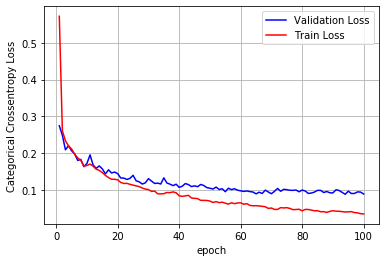

In [38]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

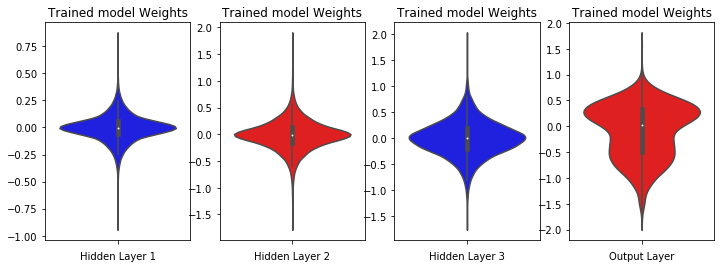

In [39]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_adam.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12, 4))

plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [40]:
#finding loss and accuracy on test data
mlp_3_adam_score = model_mlp_adam.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_adam_score[0]) 
print('Test accuracy:', mlp_3_adam_score[1])

Test score: 0.10023058600570076
Test accuracy: 0.9692


## MLP with sigmoid activation, Adam optimizer and glorot_normal initializer, 2 hidden layers, Batch Normalization

In [41]:
model_mlp_bn_2 = Sequential()
model_mlp_bn_2.add(Dense(512, input_dim=input_dim, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_bn_2.add(BatchNormalization())

model_mlp_bn_2.add(Dense(256, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_bn_2.add(BatchNormalization())

model_mlp_bn_2.add(Dense(10, activation="softmax"))
model_mlp_bn_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________


In [42]:
model_mlp_bn_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_bn_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 9s 198us/step - loss: 0.3694 - acc: 0.8884 - val_loss: 0.3490 - val_acc: 0.8891
Epoch 2/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.2785 - acc: 0.9140 - val_loss: 0.2898 - val_acc: 0.9096
Epoch 3/100
48000/48000 [==============================] - 10s 202us/step - loss: 0.2553 - acc: 0.9199 - val_loss: 0.3142 - val_acc: 0.9008
Epoch 4/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.2365 - acc: 0.9262 - val_loss: 0.2553 - val_acc: 0.9229
Epoch 5/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.2221 - acc: 0.9306 - val_loss: 0.2504 - val_acc: 0.9237
Epoch 6/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.2078 - acc: 0.9345 - val_loss: 0.2153 - val_acc: 0.9312
Epoch 7/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.1909 - acc: 0.9396 - val_loss: 0

48000/48000 [==============================] - 7s 145us/step - loss: 0.0819 - acc: 0.9734 - val_loss: 0.1234 - val_acc: 0.9643
Epoch 59/100
48000/48000 [==============================] - 7s 142us/step - loss: 0.0754 - acc: 0.9750 - val_loss: 0.1211 - val_acc: 0.9655
Epoch 60/100
48000/48000 [==============================] - 7s 145us/step - loss: 0.0679 - acc: 0.9763 - val_loss: 0.1162 - val_acc: 0.9657
Epoch 61/100
48000/48000 [==============================] - 7s 145us/step - loss: 0.0699 - acc: 0.9762 - val_loss: 0.1254 - val_acc: 0.9658
Epoch 62/100
48000/48000 [==============================] - 9s 184us/step - loss: 0.0724 - acc: 0.9758 - val_loss: 0.1226 - val_acc: 0.9663
Epoch 63/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0701 - acc: 0.9763 - val_loss: 0.1253 - val_acc: 0.9643
Epoch 64/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0721 - acc: 0.9756 - val_loss: 0.1232 - val_acc: 0.9647
Epoch 65/100
48000/48000 [=======

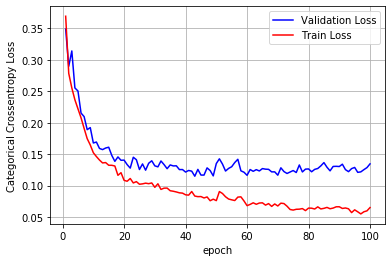

In [43]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

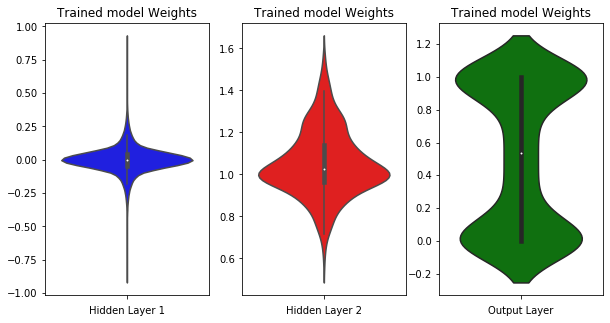

In [44]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_bn_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [45]:
#finding loss and accuracy on test data
mlp_2_bn_score = model_mlp_bn_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_bn_score[0]) 
print('Test accuracy:', mlp_2_bn_score[1])

Test score: 0.12669663480920718
Test accuracy: 0.965


## MLP with sigmoid activation, Adam optimizer and glorot_normal initializer, 3 hidden layers, Batch Normalization

In [54]:
model_mlp_bn_3 = Sequential()
model_mlp_bn_3.add(Dense(512, input_dim=input_dim, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_bn_3.add(BatchNormalization())

model_mlp_bn_3.add(Dense(256, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_bn_3.add(BatchNormalization())

model_mlp_bn_3.add(Dense(128, activation="sigmoid", kernel_initializer="glorot_normal"))
model_mlp_bn_3.add(BatchNormalization())

model_mlp_bn_3.add(Dense(10, activation="softmax"))
model_mlp_bn_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [47]:
model_mlp_bn_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history = model_mlp_bn_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv))


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 10s 213us/step - loss: 0.3645 - acc: 0.8887 - val_loss: 0.3878 - val_acc: 0.8707
Epoch 2/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.2651 - acc: 0.9171 - val_loss: 0.3453 - val_acc: 0.8884
Epoch 3/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.2352 - acc: 0.9279 - val_loss: 0.2580 - val_acc: 0.9171
Epoch 4/100
48000/48000 [==============================] - 9s 179us/step - loss: 0.2112 - acc: 0.9343 - val_loss: 0.2094 - val_acc: 0.9333
Epoch 5/100
48000/48000 [==============================] - 9s 179us/step - loss: 0.1983 - acc: 0.9373 - val_loss: 0.2059 - val_acc: 0.9375
Epoch 6/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.1776 - acc: 0.9441 - val_loss: 0.2023 - val_acc: 0.9362
Epoch 7/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.1809 - acc: 0.9423 - val_loss: 0

48000/48000 [==============================] - 9s 178us/step - loss: 0.0687 - acc: 0.9764 - val_loss: 0.1214 - val_acc: 0.9655
Epoch 60/100
48000/48000 [==============================] - 9s 178us/step - loss: 0.0697 - acc: 0.9763 - val_loss: 0.1239 - val_acc: 0.9656
Epoch 61/100
48000/48000 [==============================] - 9s 183us/step - loss: 0.0700 - acc: 0.9755 - val_loss: 0.1176 - val_acc: 0.9667
Epoch 62/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0655 - acc: 0.9778 - val_loss: 0.1150 - val_acc: 0.9666
Epoch 63/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0673 - acc: 0.9766 - val_loss: 0.1194 - val_acc: 0.9657
Epoch 64/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.0682 - acc: 0.9765 - val_loss: 0.1314 - val_acc: 0.9631
Epoch 65/100
48000/48000 [==============================] - 9s 181us/step - loss: 0.0679 - acc: 0.9769 - val_loss: 0.1251 - val_acc: 0.9633
Epoch 66/100
48000/48000 [=======

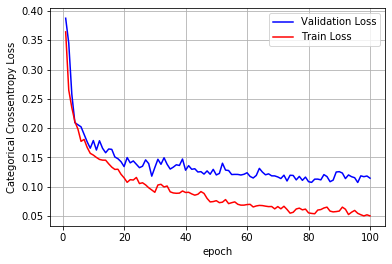

In [48]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

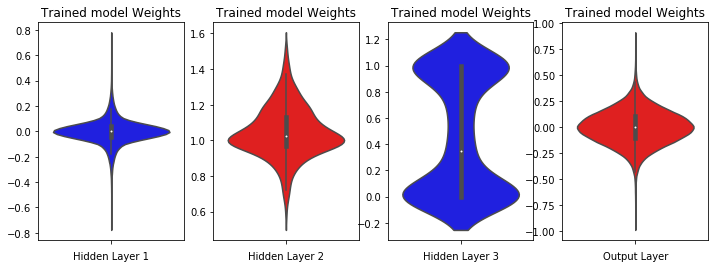

In [49]:
#monitoring weights to check if they are not overshooting
w_after = model_mlp_bn_3.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12, 4))

plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [50]:
#finding loss and accuracy on test data
mlp_3_bn_score = model_mlp_bn_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_bn_score[0]) 
print('Test accuracy:', mlp_3_bn_score[1])

Test score: 0.10965993826230988
Test accuracy: 0.9678


In [51]:
from prettytable import PrettyTable

table = PrettyTable();
table.field_names = ['Network(# units)', 'Hidden Layers', 'Activation','Optimizer', 'Weight Initializer', 'BN', 'Accuracy'];

table.add_row(['Single Layer', 0, 'Sigmoid', 'SGD', 'None', 'No',mlp_1_score[1]]);
table.add_row(['MLP(512, 128)', 2,'Sigmoid' ,'SGD', 'None', 'No',mlp_2_score[1]]);
table.add_row(['MLP(512, 256)', 2,'Sigmoid' ,'SGD', 'None', 'No',mlp_2_b_score[1]]);
table.add_row(['MLP(512, 256, 128)', 3,'Sigmoid' ,'SGD', 'None', 'No',mlp_3_score[1]]);
table.add_row(['MLP(512, 256)', 2,'Sigmoid' ,'Adam', 'glorot_normal','No', mlp_2_adam_score[1]]);
table.add_row(['MLP(512, 256, 128)', 3,'Sigmoid' ,'Adam', 'glorot_normal', 'No',mlp_3_adam_score[1]]);
table.add_row(['MLP(512, 256)', 2,'Sigmoid' ,'Adam', 'glorot_normal', 'Yes',mlp_2_bn_score[1]]);
table.add_row(['MLP(512, 256, 128)', 3,'Sigmoid' ,'Adam', 'glorot_normal', 'Yes',mlp_3_bn_score[1]]);

print(table)

+--------------------+---------------+------------+-----------+--------------------+-----+----------+
|  Network(# units)  | Hidden Layers | Activation | Optimizer | Weight Initializer |  BN | Accuracy |
+--------------------+---------------+------------+-----------+--------------------+-----+----------+
|    Single Layer    |       0       |  Sigmoid   |    SGD    |        None        |  No |  0.4884  |
|   MLP(512, 128)    |       2       |  Sigmoid   |    SGD    |        None        |  No |  0.9502  |
|   MLP(512, 256)    |       2       |  Sigmoid   |    SGD    |        None        |  No |  0.9523  |
| MLP(512, 256, 128) |       3       |  Sigmoid   |    SGD    |        None        |  No |  0.9498  |
|   MLP(512, 256)    |       2       |  Sigmoid   |    Adam   |   glorot_normal    |  No |  0.9704  |
| MLP(512, 256, 128) |       3       |  Sigmoid   |    Adam   |   glorot_normal    |  No |  0.9692  |
|   MLP(512, 256)    |       2       |  Sigmoid   |    Adam   |   glorot_normal   

## Hyper parameter tuning using hyperas

In [79]:
def data():

    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    #seperating cv data from train data
    X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=123, stratify=Y_train)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])
    X_cv = X_cv.reshape(X_cv.shape[0], X_cv.shape[1]*X_cv.shape[1])
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_cv = X_cv.astype('float32')
    X_train /= 255
    X_test /= 255
    X_cv /= 255
    nb_classes = 10
    Y_train = np_utils.to_categorical(Y_train, nb_classes)
    Y_test = np_utils.to_categorical(Y_test, nb_classes)
    Y_cv = np_utils.to_categorical(Y_cv, nb_classes)
    return X_train, Y_train, X_cv, Y_cv, X_test, Y_test

In [81]:
def create_model(X_train, Y_train, X_cv, Y_cv, X_test, Y_test):
    model = Sequential()
    model.add(Dense({{choice([512, 1024])}}, input_dim=784, kernel_initializer="glorot_normal"))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))

    model.add(Dense({{choice([128, 256, 512])}}, kernel_initializer="glorot_normal"))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))    

    model.add(Dense({{choice([128, 256, 512])}}, kernel_initializer="glorot_normal"))
    model.add(Activation({{choice(['relu', 'sigmoid'])}})) 

    model.add(Dense(10, activation="softmax"))
    model.summary()

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    result = model.fit(X_train, Y_train, batch_size={{choice([128,256,512])}}, nb_epoch=20, verbose=2, validation_data=(X_cv, Y_cv))


    return {'loss': -np.amax(result.history['val_acc']), 'status': STATUS_OK, 'model': model}

In [82]:
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5, #specifies no. of models to try to get best one
                                          trials=Trials(),
                                          notebook_name='Learning_MLP')

>>> Imports:
#coding=utf-8

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    from keras.initializers import RandomNormal, glorot_normal
except:
    pass

try:
    from keras.layers.normalization import BatchNormalization
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Activation
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import time
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from prettytable import PrettyTable
except:
    pass

>>> Hyperas

D:\training\ML-material\8 neural network, computer vision and deep learning\3 Deep Learning Tensorflow and Keras\temp_model.py:116: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 48000 samples, validate on 12000 samples                                                                                                   
Epoch 1/20                                                                                                                                          
 - 8s - loss: 2.3218 - acc: 0.1125 - val_loss: 2.2974 - val_acc: 0.1123                                                                             

Epoch 2/20                                                                                                                                          
 - 8s - loss: 2.2957 - acc: 0.1234 - val_loss: 2.2944 - val_acc: 0.1123                                                                             

Epoch 3/20                                                                                                                                          
 - 8s - loss: 2.2924 - acc: 0.1172 - val_loss: 2.2906 - val_acc: 0.1123                                 

_________________________________________________________________                                                                                   
activation_12 (Activation)   (None, 256)               0                                                                                            
_________________________________________________________________                                                                                   
dense_49 (Dense)             (None, 10)                2570                                                                                         
Total params: 503,178                                                                                                                               
Trainable params: 503,178                                                                                                                           
Non-trainable params: 0                                                                                   

dense_50 (Dense)             (None, 1024)              803840                                                                                       
_________________________________________________________________                                                                                   
activation_13 (Activation)   (None, 1024)              0                                                                                            
_________________________________________________________________                                                                                   
dense_51 (Dense)             (None, 128)               131200                                                                                       
_________________________________________________________________                                                                                   
activation_14 (Activation)   (None, 128)               0                                                  

 - 5s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0684 - val_acc: 0.9811                                                                             

Epoch 19/20                                                                                                                                         
 - 5s - loss: 8.3217e-04 - acc: 1.0000 - val_loss: 0.0694 - val_acc: 0.9816                                                                         

Epoch 20/20                                                                                                                                         
 - 5s - loss: 7.1119e-04 - acc: 1.0000 - val_loss: 0.0704 - val_acc: 0.9812                                                                         

Model: "sequential_18"                                                                                                                              
_________________________________________________________________                                      

Epoch 14/20                                                                                                                                         
 - 5s - loss: 0.0042 - acc: 0.9987 - val_loss: 0.0808 - val_acc: 0.9795                                                                             

Epoch 15/20                                                                                                                                         
 - 5s - loss: 0.0079 - acc: 0.9975 - val_loss: 0.1126 - val_acc: 0.9742                                                                             

Epoch 16/20                                                                                                                                         
 - 5s - loss: 0.0088 - acc: 0.9971 - val_loss: 0.0885 - val_acc: 0.9793                                                                             

Epoch 17/20                                                                                            

 - 7s - loss: 0.0227 - acc: 0.9922 - val_loss: 0.0743 - val_acc: 0.9813                                                                             

Epoch 10/20                                                                                                                                         
 - 7s - loss: 0.0185 - acc: 0.9940 - val_loss: 0.0895 - val_acc: 0.9782                                                                             

Epoch 11/20                                                                                                                                         
 - 7s - loss: 0.0151 - acc: 0.9952 - val_loss: 0.1357 - val_acc: 0.9681                                                                             

Epoch 12/20                                                                                                                                         
 - 7s - loss: 0.0116 - acc: 0.9960 - val_loss: 0.1063 - val_acc: 0.9760                                

In [85]:
print(best_run)

{'Activation': 0, 'Activation_1': 1, 'Activation_2': 0, 'Dense': 1, 'Dense_1': 1, 'Dense_2': 2, 'batch_size': 2, 'optimizer': 0}


In [86]:
best_model.evaluate(X_test, Y_test)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 150us/step


[0.16079211135122737, 0.9779]